In [1]:
from importlib.metadata import version
import nltk
import tensorflow
import summa
import re
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(nltk.__version__)
print(tensorflow.__version__)
print(pd.__version__)
print(version('summa'))

3.6.5
2.6.0
1.3.3
1.2.0


In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [3]:
data.sample(10)

,headlines,text
96111,Pitch criticism in India was defence mechanism...,Former Bangladesh coach Dav Whatmore has said ...
69257,Air is so free and unused: CEO of flying car s...,Flying car startup Kitty Hawk's CEO Sebastian ...
4833,"Tolerance our biggest asset, unity our special...",Union Minister Nitin Gadkari on Monday said to...
83191,BJP activists clean venue with cow urine after...,Workers of the BJP Yuva Morcha carried out a '...
19756,'Gold' becomes Akshay's 9th film to enter Ã¢Â...,With earnings of Ã¢ÂÂ¹100.45 crore within 13 ...
39818,Chhetri scores chip-goal over the keeper in In...,Indian football team captain Sunil Chhetri sco...
76287,Moksha & Siddham devices by Swartantra help so...,Moksha by Swartantra is a custom made personal...
66041,TMC leader Mukul Roy resigns as Rajya Sabha MP,Trinamool Congress (TMC) leader Mukul Roy on W...
91896,"Playing Joker didn't cause Heath's death, says...",Late Hollywood actor Heath Ledger's sister Kat...
26390,Will time ever be right to make rape laws gend...,Hearing a petition against the gender-specific...


In [4]:
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98401


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 전처리
중복과 결측치 제거

In [6]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 98280
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 98360


In [7]:
data.drop_duplicates(subset = ['headlines'], inplace=True)
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98262


In [8]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


텍스트 정규화와 불용어 처리

In [9]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [10]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [11]:
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").get_text(" ") # <br />, <a href = ...> 등의 html 태그 제거(" "로 대체)
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [12]:
clean_headlines = []

for headlines in data['headlines']:
    clean_headlines.append(preprocess_sentence(headlines))
    
clean_text = []

for text in data['text']:
    clean_text.append(preprocess_sentence(text))

In [13]:
import numpy as np
data['headlines'] = clean_headlines
data['text'] = clean_text

data.replace('', np.nan, inplace=True)

In [14]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98262


샘플의 최대 길이 정하기

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.10029309397326
요약의 최소 길이 : 1
요약의 최대 길이 : 13
요약의 평균 길이 : 7.136787364393153


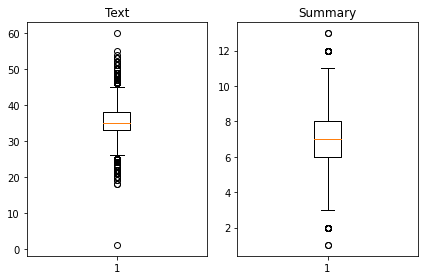

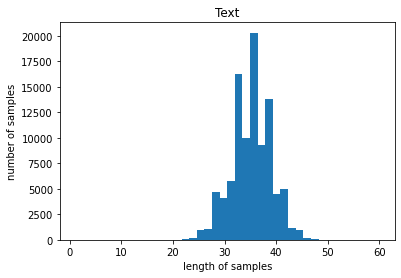

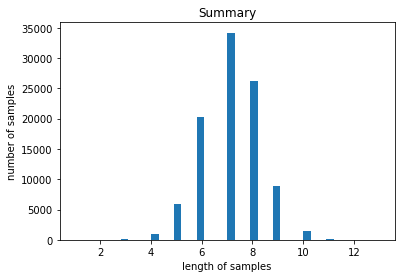

In [15]:
text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

headline은 9, text는 45로 끊었습니다.

In [16]:
text_max_len = 45
summary_max_len = 9

In [17]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [18]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(summary_max_len,  data['headlines'])

전체 샘플 중 길이가 45 이하인 샘플의 비율: 0.9967739309193788
전체 샘플 중 길이가 9 이하인 샘플의 비율: 0.9826077222120454


In [19]:
#data = data[data['text'].apply(lambda x: len(x.split())) <= text_max_len]
#data = data[data['headlines'].apply(lambda x: len(x.split())) <= summary_max_len]

data = data[data.apply(
    lambda x: len(x['text'].split()) <= text_max_len and len(x['headlines'].split()) <= summary_max_len, axis=1
    )]

시작, 종료 토큰추가

In [20]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches career ml al salary hike,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches career ml al ...,upgrad learner switches career ml al salary hi...
1,delhi techie wins free food swiggy one year cred,kunal shah credit card bill payment platform c...,sostoken delhi techie wins free food swiggy on...,delhi techie wins free food swiggy one year cr...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
4,known hirani yrs metoo claims true sonam,speaking sexual harassment allegations rajkuma...,sostoken known hirani yrs metoo claims true sonam,known hirani yrs metoo claims true sonam eostoken
5,rahat fateh ali khan denies getting notice smu...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice smu...


In [21]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

훈련데이터와 테스트데이터 분리

In [22]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[60385  4164 42426 ... 84584 21201 24124]


In [23]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [24]:
n_of_val = int(len(encoder_input)*0.2)
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 77022
훈련 레이블의 개수 : 77022
테스트 데이터의 개수 : 19255
테스트 레이블의 개수 : 19255


단어집합 만들기 및 정수 인코딩

In [25]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 68808
등장 빈도가 6번 이하인 희귀 단어의 수: 46974
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 21834
단어 집합에서 희귀 단어의 비율: 68.2682246250436
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.542610568538671


In [26]:
src_vocab = 22000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 22,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

#정수인코딩
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [27]:
print(encoder_input_train[:3])

[[654, 573, 7076, 12, 191, 1442, 487, 558, 413, 1123, 3275, 791, 14637, 869, 253, 172, 395, 61, 879, 385, 5, 16, 120, 40, 274, 3718, 40, 12460, 374, 177, 440, 6538, 1232, 899, 395, 911, 5, 16, 504, 3019, 374], [620, 216, 7954, 231, 259, 6539, 14118, 9169, 1574, 440, 7810, 380, 6968, 9719, 1710, 2062, 7175, 110, 3141, 620, 743, 5, 4078, 1778, 126, 991, 576, 1139, 275, 281, 371, 14118, 1403, 852, 798, 576, 82, 620, 94, 303, 721], [9170, 2941, 8063, 3497, 3073, 4204, 1944, 267, 12833, 586, 5973, 3375, 205, 149, 150, 107, 90, 1691, 7077, 5, 19, 90, 12834, 4204, 431, 215, 56, 450]]


In [28]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29553
등장 빈도가 5번 이하인 희귀 단어의 수: 19387
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10166
단어 집합에서 희귀 단어의 비율: 65.60078503028457
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.963546644521154


In [29]:
tar_vocab = 10000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 679, 2052, 83, 4660, 122, 193], [1, 269, 1440, 588, 215, 1478, 730, 276], [1, 1547, 9, 219, 4492, 2526, 2470, 2201], [1, 688, 128, 6254, 912], [1, 366, 913, 87, 5978, 400, 259]]
target
decoder  [[679, 2052, 83, 4660, 122, 193, 2], [269, 1440, 588, 215, 1478, 730, 276, 2], [1547, 9, 219, 4492, 2526, 2470, 2201, 2], [688, 128, 6254, 912, 2], [366, 913, 87, 5978, 400, 259, 2]]


sostoken과 eostoken만 남은 경우 삭제

In [30]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 2
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 77020
훈련 레이블의 개수 : 77020
테스트 데이터의 개수 : 19255
테스트 레이블의 개수 : 19255


패딩

post

In [31]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

pre

In [32]:
encoder_input_train_pre = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='pre')
encoder_input_test_pre = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='pre')
decoder_input_train_pre = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='pre')
decoder_target_train_pre = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='pre')
decoder_input_test_pre = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='pre')
decoder_target_test_pre = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='pre')

인코더

In [33]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

디코더

In [34]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 45, 128)      2816000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 45, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

어텐션

In [35]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 45, 128)      2816000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 45, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

모델 컴파일 및 훈련

In [36]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, 
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), 
          batch_size=256, callbacks=[es], 
          epochs=50)

Epoch 1/50
301/301 [==============================] - 32s 84ms/step - loss: 6.1381 - val_loss: 5.7486
Epoch 2/50
301/301 [==============================] - 25s 82ms/step - loss: 5.5607 - val_loss: 5.2877
Epoch 3/50
301/301 [==============================] - 25s 84ms/step - loss: 5.1971 - val_loss: 5.0131
Epoch 4/50
301/301 [==============================] - 26s 85ms/step - loss: 4.9091 - val_loss: 4.8109
Epoch 5/50
301/301 [==============================] - 26s 87ms/step - loss: 4.6774 - val_loss: 4.6582
Epoch 6/50
301/301 [==============================] - 27s 89ms/step - loss: 4.4857 - val_loss: 4.5404
Epoch 7/50
301/301 [==============================] - 27s 89ms/step - loss: 4.3228 - val_loss: 4.4617
Epoch 8/50
301/301 [==============================] - 27s 89ms/step - loss: 4.1788 - val_loss: 4.3958
Epoch 9/50
301/301 [==============================] - 27s 89ms/step - loss: 4.0512 - val_loss: 4.3365
Epoch 10/50
301/301 [==============================] - 27s 89ms/step - loss: 3.935

- EarlyStopping을 적용하지 않은 모델의 epoch결과
![screenshot](./ex0501.png)
![screenshot](./ex0502.png)

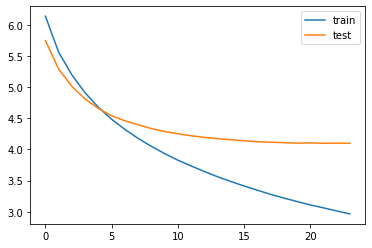

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

인퍼런스 모델 구현

In [38]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

인코더

In [39]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

어텐션

In [40]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

단어 시퀀스를 디코드하는 함수

In [41]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [42]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp.strip()  # 마지막 공백 제거 후 반환

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        if i == 0:  # 패딩을 위한 숫자 0은 제외
            continue
        if i == tar_word_to_index['sostoken']:  # 시작 토큰은 제외
            continue
        if i == tar_word_to_index['eostoken']:  # 종료 토큰은 제외
            break
        temp = temp + tar_index_to_word[i] + ' '  # 단어 추가
    return temp.strip()  # 마지막 공백 제거 후 반환

In [43]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : singer udit narayan son aditya released bail car rammed auto rickshaw monday police said aditya paid fine taken injured driver passenger hospital accident year old driver admitted icu head injuries passenger suffered fractured leg
실제 요약 : narayan son given bail car auto
예측 요약 :  father arrested car accident case delhi


원문 : minor rape victim fir convicted self styled godman asaram stated asaram summoned cottage naked asked oral sex describing ordeal said locked room inside started molesting started shouting threatened kill parents closed mouth
실제 요약 : asaram naked asked oral sex rape victim fir
예측 요약 :  rape accused maharaj rape victim


원문 : software firm ibm developed device called crypto anchor uses artificial intelligence optical imaging detect counterfeit goods device attached smartphone camera put item surface verify authenticity compares optical patterns unique items detect counterfeit medicine wine diamonds
실제 요약 : ibm develops ai enabled device detect goods
예측 요약 :  ai f

예측 요약 :  centre approves lakh courts set cow


원문 : india today conclave east tripura cm biplab deb said update national register citizens proves successful assam centre passes law act implement nrc go deb added recently home ministry officials clarified decision taken revising nrc tripura
실제 요약 : update nrc successful assam tripura cm
예측 요약 :  assam nrc nrc nrc assam cm nrc


원문 : uk mp phillips accused british pakistanis going getting wife abroad disabled sons lots cases people pakistani bangladeshi communities behave towards women said british pakistani bangladeshi community certainly issues women roles family society added
실제 요약 : british pakistanis import wives disabled sons uk mp
예측 요약 :  pakistan mp cop jailed years ago


원문 : delhi high court fined google owned youtube lakh failing remove offensive video platform case filed involved video targeting delhi based doctor practices total amount hc said lakh paid mediation centre trial costs
실제 요약 : delhi hc fines youtube removing of

예측 요약 :  ranbir mahira mahira tweet ranbir mahira


원문 : delhi captain gautam gambhir friday became first ever batsman retired indian domestic list match gambhir smashed including boundaries kerala innings th give batsmen chance batsman gets retired retires reasons injury resume innings
실제 요약 : gambhir retired scoring give batsmen chance
예측 요약 :  gambhir st indian cricketer score ipl




- EarlyStopping을 적용하지 않은 경우의 출력은 non_es_output.txt파일에 기록해 두었습니다.

### 추출적 요약

In [44]:
import requests
from summa.summarizer import summarize

text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

0.005% 출력 요약

In [45]:
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


출력을 리스트로 요약

In [46]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


요약문 단어 수 제한

In [47]:
print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [51]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("summa 요약 :", summarize(seq2text(encoder_input_test[i])))
    print("\n")

원문 : singer udit narayan son aditya released bail car rammed auto rickshaw monday police said aditya paid fine taken injured driver passenger hospital accident year old driver admitted icu head injuries passenger suffered fractured leg
실제 요약 : narayan son given bail car auto
예측 요약 :  father arrested car accident case delhi
summa 요약 : 


원문 : minor rape victim fir convicted self styled godman asaram stated asaram summoned cottage naked asked oral sex describing ordeal said locked room inside started molesting started shouting threatened kill parents closed mouth
실제 요약 : asaram naked asked oral sex rape victim fir
예측 요약 :  rape accused maharaj rape victim
summa 요약 : 


원문 : software firm ibm developed device called crypto anchor uses artificial intelligence optical imaging detect counterfeit goods device attached smartphone camera put item surface verify authenticity compares optical patterns unique items detect counterfeit medicine wine diamonds
실제 요약 : ibm develops ai enabled device de

예측 요약 :  centre approves lakh courts set cow
summa 요약 : 


원문 : india today conclave east tripura cm biplab deb said update national register citizens proves successful assam centre passes law act implement nrc go deb added recently home ministry officials clarified decision taken revising nrc tripura
실제 요약 : update nrc successful assam tripura cm
예측 요약 :  assam nrc nrc nrc assam cm nrc
summa 요약 : 


원문 : uk mp phillips accused british pakistanis going getting wife abroad disabled sons lots cases people pakistani bangladeshi communities behave towards women said british pakistani bangladeshi community certainly issues women roles family society added
실제 요약 : british pakistanis import wives disabled sons uk mp
예측 요약 :  pakistan mp cop jailed years ago
summa 요약 : 


원문 : delhi high court fined google owned youtube lakh failing remove offensive video platform case filed involved video targeting delhi based doctor practices total amount hc said lakh paid mediation centre trial costs
실제 요약 

예측 요약 :  jadeja scores fastest ton odi cricket st time
summa 요약 : 


원문 : pakistani actress mahira khan corrected user misspelled ranbir kapoor name trolling pictures showed smoking ranbir kapoor new york mahira wished pakistani cricketer mohammad hafeez troll commented hai koi nahin mil jab say ranveer kapoor pictures correcting mahira replied ranbir
실제 요약 : mahira corrects user trolled smoking pics ranbir
예측 요약 :  ranbir mahira mahira tweet ranbir mahira
summa 요약 : 


원문 : delhi captain gautam gambhir friday became first ever batsman retired indian domestic list match gambhir smashed including boundaries kerala innings th give batsmen chance batsman gets retired retires reasons injury resume innings
실제 요약 : gambhir retired scoring give batsmen chance
예측 요약 :  gambhir st indian cricketer score ipl
summa 요약 : 




### 회고
- 추상적요약 모델에서는 문법과 문맥이 비교적 자연스럽게 이어젔다. 하지만 단어들이 문장에 아예 없는 단어로 구성된 경우가 많았다.
- 추출적요약 모델에서는 문법이 자연스럽지 않았다. 하지만 단어의 구성이 문장 내에 있는 단어로 구성되어 있었다.
- 추상적요약 모델의 경우 약 25번째 epoch에서 매번 최적적합을 달성했다.
- summa의 summarize는 TextRank알고리즘으로 구성되어 한문장인 경우의 요약을 제공하지 않는다.
    - TextRank 동작방식
        1. 텍스트를 그래프로 표현
        2. 그래프 초기화
        3. 유사도 계산(코사인 유사도)
        4. 각 문장의 중요도를 반복적으로 계산하며 업데이트
        5. 중요도에 따라 정렬
        6. 요약문 또는 키워드 생성
- summarize가 한문장인 경우의 요약을 제공하지 않아서 직접적인 비교는 어렵지만 표로 정리해 문법완성도와 핵심단어 포함을 비교하였다.  

|    |문법완성도|핵심단어|
|----|----------|--------|
|추상적 요약|(father arrested car accident delhi) 문장을 생성하기 때문에 비교적 문법이 잘 지켜지고 문맥적으로도 자연스럽다.|핵심 내용을 생성해서 표현하기 때문에 문법과 문맥은 자연스럽지만 원문에 없는 단어가 다수 등장한다.|
|추출적 요약|문법이 잘 지켜지지 않는다. 원문에서 문법의 오류가 있거나 문장에서 그대로 단어를 가저오는 방식 때문에 단어의 사용이 문법적으로 맞지 않는 경우가 많다.|문장에서 추출할 단어를 선택하므로 핵심단어가 포함될 확률이 높다.|

### 추가실험 해볼것
- 어제의 프로젝트에서 패딩이 post인지 pre인지에 따라 성능이 차이가 있었다. 실험할때 따로 준비해둔 pre로 패딩된 데이터를 활용하여 다시 훈련하고 그 결과를 지켜본다.
- unroll옵션을 사용해 훈련속도에 유의미한 향상이 있는지 지켜본다.
- summa의 keywords함수를 사용하면 한문장인 경우에도 핵심단어 추출을 시행할 수 있다.
```python
from summa import keywords  
keywords_summary = keywords(text, words=5, split=True)  
print("한 문장 요약: ", keywords_summary)
```

- 인퍼런스 단계에서 함수 코드를 추가하는 것에 대해
    - 훈련단계와 인퍼런스단계에서의 동작이 다르기 때문에 그 구조도 달라저서 인퍼런스 단계의 모델을 훈련단계와 다르게 구성합니다.
    - 훈련단계
        - 훈련데이터로 정답 시퀀스를 정확히 예측하도록 동작합니다.
        - 디코더입력으 정답 시퀀스의 이전 단어들이 사용됩니다.
    - 추론단계
        - 인퍼런스시에는 정답 시퀀스를 알 수 없습니다.
        - 디코더에서 이전에 생성한 단어를 기반으로 다음 단어를 예측해야 합니다.
            - 재귀적인 구조가 필요
    - 인퍼런스와 훈련에서 동작이 다른것들이 몇개 있는걸로 알고있습니다. 다른것들도 찾아보는것도 좋은 공부가 될거 같습니다. (ex. batch normalize의 running var, running avg)